## 1. Importing all libraries

In [115]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima.arima.utils import ndiffs
from statsmodels.graphics.tsaplots import plot_pacf
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
import math

## 2. Downloading dataset from kaggle using kaggle api

In [117]:
# %cd "/content/drive/MyDrive/Shared Resume /Projects/Stock Market"
# !echo '{"username":"pushpendra6202","key":"f8ef936d6f0608419cfe91e7f7440fe0"}' > ~/.kaggle/kaggle.json
# !kaggle datasets download -d rohanrao/nifty50-stock-market-data --force

### 2.1 Unziping the data

In [118]:
# !unzip "/content/drive/MyDrive/Shared Resume /Projects/Stock Market/nifty50-stock-market-data.zip" -d "/content/drive/MyDrive/Shared Resume /Projects/Stock Market"

### 2.2 Looking at stock market data

In [119]:
stock_metadata=pd.read_csv("/content/drive/MyDrive/Shared Resume /Projects/Stock Market/stock_metadata.csv")

In [120]:
stock_metadata.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
1,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026
2,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034
3,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010
4,Bajaj Finserv Ltd.,FINANCIAL SERVICES,BAJAJFINSV,EQ,INE918I01018


### 2.3 Checking the length of entries for various companies.

In [121]:
directory = '/content/drive/MyDrive/Shared Resume /Projects/Stock Market'
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        if f[-3:]=='csv':
          print(f"Data points in {f[60:-4]} {len(pd.read_csv(f))}")

Data points in GAIL 4985
Data points in ASIANPAINT 5306
Data points in GRASIM 5306
Data points in BAJAJ-AUTO 3202
Data points in HCLTECH 5300
Data points in HDFCBANK 5306
Data points in CIPLA 5306
Data points in EICHERMOT 5301
Data points in BHARTIARTL 4774
Data points in ADANIPORTS 3322
Data points in COALINDIA 2598
Data points in BAJAJFINSV 3201
Data points in HDFC 5306
Data points in BRITANNIA 5305
Data points in HINDALCO 5306
Data points in BPCL 5306
Data points in BAJFINANCE 5235
Data points in DRREDDY 5306
Data points in HEROMOTOCO 5306
Data points in AXISBANK 5306
Data points in LT 4184
Data points in INFY 5306
Data points in KOTAKBANK 4985
Data points in INFRATEL 0
Data points in INDUSINDBK 4985
Data points in ICICIBANK 5306
Data points in IOC 5306
Data points in HINDUNILVR 5306
Data points in NESTLEIND 2806
Data points in NIFTY50_all 235192
Data points in JSWSTEEL 3994
Data points in MM 5306
Data points in MARUTI 4427
Data points in ITC 5306
Data points in TECHM 3635
Data poin

In [122]:
all=pd.read_csv("/content/drive/MyDrive/Shared Resume /Projects/Stock Market/NIFTY50_all.csv")

In [123]:
all

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235187,2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
235188,2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
235189,2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864
235190,2021-04-29,ZEEL,EQ,189.10,190.80,191.65,186.00,186.60,186.55,187.44,9483009,1.777471e+14,60932.0,2744472.0,0.2894


## 3 Exploratory Data Analysis of Asian Paints data

In [124]:
asian=pd.read_csv("/content/drive/MyDrive/Shared Resume /Projects/Stock Market/ASIANPAINT.csv",parse_dates=['Date'])
asian.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ASIANPAINT,EQ,361.20,370.0,390.0,370.0,385.0,381.65,380.54,3318,1.262617e+11,NaN,NaN,NaN
1,2000-01-04,ASIANPAINT,EQ,381.65,380.0,392.0,375.0,390.0,385.55,383.50,4818,1.847699e+11,NaN,NaN,NaN
2,2000-01-05,ASIANPAINT,EQ,385.55,371.5,390.0,371.5,383.0,383.00,379.81,2628,9.981384e+10,NaN,NaN,NaN
3,2000-01-06,ASIANPAINT,EQ,383.00,384.9,384.9,374.5,375.1,377.50,379.88,3354,1.274114e+11,NaN,NaN,NaN
4,2000-01-07,ASIANPAINT,EQ,377.50,376.0,390.0,370.0,389.0,385.70,383.38,9589,3.676275e+11,NaN,NaN,NaN


In [125]:
asian.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5306 non-null   datetime64[ns]
 1   Symbol              5306 non-null   object        
 2   Series              5306 non-null   object        
 3   Prev Close          5306 non-null   float64       
 4   Open                5306 non-null   float64       
 5   High                5306 non-null   float64       
 6   Low                 5306 non-null   float64       
 7   Last                5306 non-null   float64       
 8   Close               5306 non-null   float64       
 9   VWAP                5306 non-null   float64       
 10  Volume              5306 non-null   int64         
 11  Turnover            5306 non-null   float64       
 12  Trades              2456 non-null   float64       
 13  Deliverable Volume  4797 non-null   float64     

In [126]:
asian.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

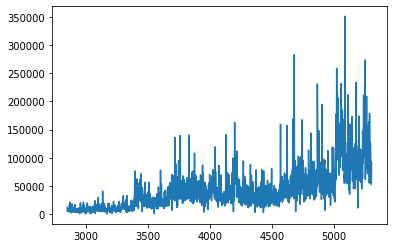

In [127]:
plt.plot(asian['Trades'])

In [128]:
asian['Trades'][3000:]

3000       70.0
3001     3960.0
3002     3888.0
3003     7980.0
3004     4119.0
         ...   
5301    58557.0
5302    66988.0
5303    52622.0
5304    64039.0
5305    91934.0
Name: Trades, Length: 2306, dtype: float64

In [129]:
asian.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,1247.000952,1247.683952,1264.625349,1230.900697,1247.317132,1247.410903,1247.799926,5.096721e+05,6.942919e+13,41346.011401,2.751281e+05,0.625572
std,1074.399506,1074.025577,1087.238871,1062.629409,1074.432667,1074.476439,1075.057438,8.535993e+05,1.443973e+14,36435.449733,4.157465e+05,0.187597
min,210.750000,210.000000,215.750000,204.000000,210.600000,210.750000,212.220000,2.500000e+01,1.278415e+09,70.000000,2.500000e+01,0.076800
25%,415.737500,415.000000,424.950000,410.000000,416.000000,416.262500,415.692500,1.370750e+04,7.538133e+11,16264.750000,1.262200e+04,0.486200
50%,889.375000,890.000000,903.975000,878.075000,890.000000,889.475000,888.350000,5.713600e+04,1.109437e+13,32402.500000,5.273800e+04,0.616100
75%,1599.037500,1599.800000,1629.675000,1573.037500,1602.500000,1600.762500,1600.982500,8.077905e+05,7.761479e+13,54727.500000,4.383750e+05,0.765500
max,5213.100000,5221.100000,5247.750000,5150.050000,5221.100000,5213.100000,5175.790000,1.154594e+07,2.216650e+15,351347.000000,7.938427e+06,1.000000


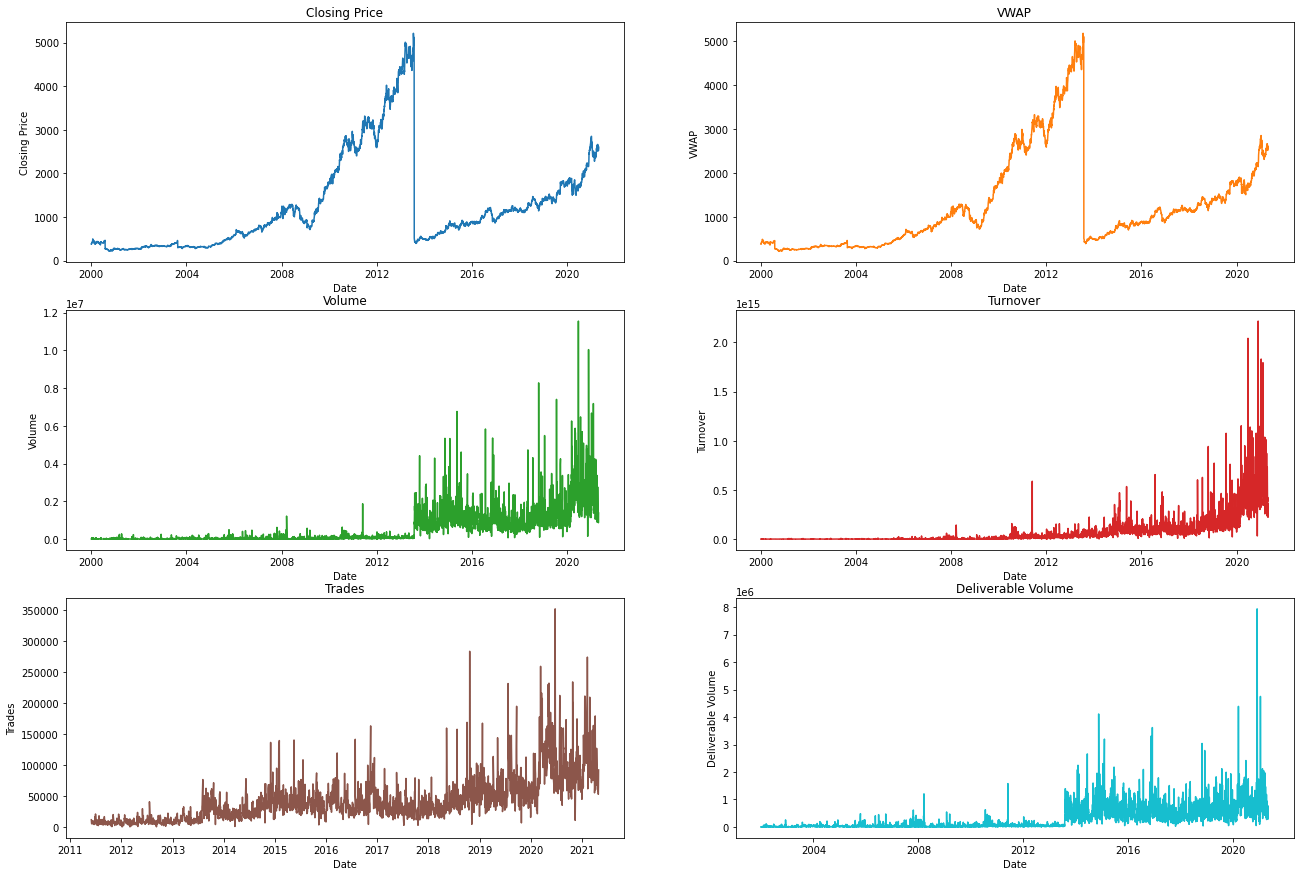

In [130]:
fig, axs = plt.subplots(3, 2)
fig.set_figheight(15)
fig.set_figwidth(22)
axs[0, 0].plot(asian['Date'],asian['Close'])
axs[0, 0].set_title('Closing Price')
axs[0, 1].plot(asian['Date'],asian['VWAP'], 'tab:orange')
axs[0, 1].set_title('VWAP')
axs[1, 0].plot(asian['Date'],asian['Volume'], 'tab:green')
axs[1, 0].set_title('Volume')
axs[1, 1].plot(asian['Date'],asian['Turnover'], 'tab:red')
axs[1, 1].set_title('Turnover')
axs[2, 0].plot(asian['Date'],asian['Trades'], 'tab:brown')
axs[2, 0].set_title('Trades')
axs[2, 1].plot(asian['Date'],asian['Deliverable Volume'], 'tab:cyan')
axs[2, 1].set_title('Deliverable Volume')
label=['Deliverable Volume','Trades','Turnover','Volume','VWAP','Closing Price']
for ax in axs.flat:
    ax.set(xlabel='Date',ylabel=label[-1])
    label.pop()


### From the above plots, it is clear that the 

*   Closing price for asian paints droped substancially in around 2013.
*   The Volume of stockes being sold increased in year 2013.
*   It can be safely concluded that it was due to the infused liquidity.



Text(0.5, 0, 'Closing Price')

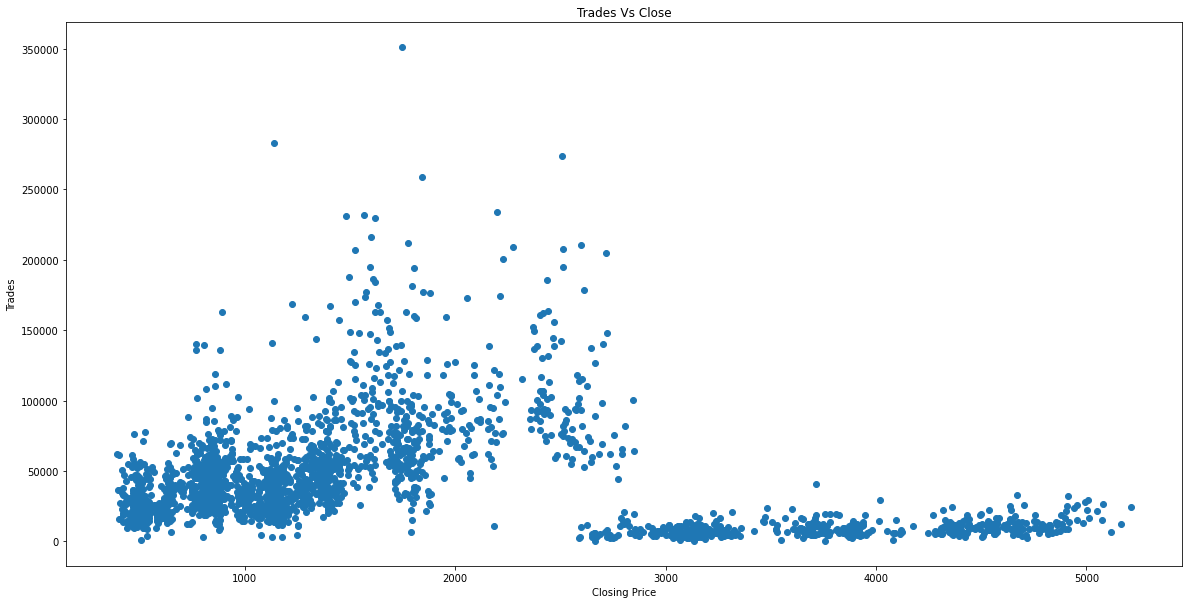

In [131]:
plt.figure(figsize=(20,10))
plt.scatter(x=asian['Close'],y=asian['Trades'])
plt.title("Trades Vs Close")
plt.ylabel("Trades")
plt.xlabel("Closing Price")

## 3 ARIMA (Auto Regressive Integrated Moving Average) MODEL

### 3.1 Adfuller Test

#### Augumented Dickey Fuller (ADF) test


*   The null hypothesis is that the time series is `Non-Stationary`.
*   If p value is less than the significance level (0.05) then we can reject the null hypothesis.



In [132]:
result=adfuller(asian['Close'].dropna()) 
print(f"ADF Statitistics: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statitistics: -2.1347289368840836
p-value: 0.23078109376737788


#### The p-value is greater than `0.05` so we need to find the order of differencing.

### 3.2 Plotting ACF (Autocorrelation Function) curves


*   It is used to find the order of differencing mannually.
*   It tells us how many terms are required to remove any auto correlation in the series.



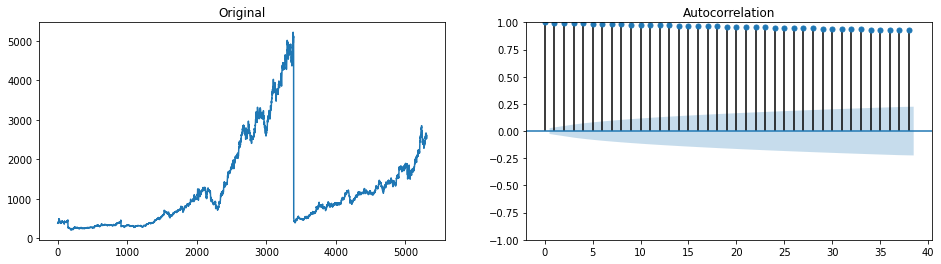

In [133]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(asian.Close)
ax1.set_title("Original")
plot_acf(asian.Close,ax=ax2);

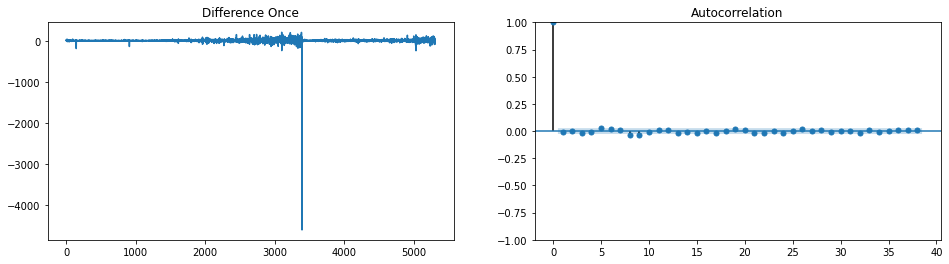

In [134]:
diff=asian.Close.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Once")
plot_acf(diff,ax=ax2);

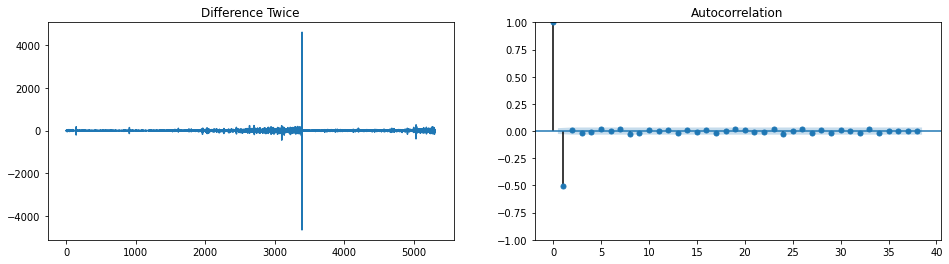

In [135]:
diff=asian.Close.diff().diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Twice")
plot_acf(diff,ax=ax2);

On second differencing the lags goes far negative than the first differencing, it suggests the series is over differenced. So, We will choose order of differencing as 1.

#### Using pmdarima package to get the order of differencing

In [136]:
ndiffs(asian.Close,test='adf')

1

We got the same result that we got ACF plots

### 3.3 (p) Order of Autoregressive (AR) term


*   We can get the required number of AR terms by inspecting the PACF plot.
*   The partial autocorrelation (pacf) represents the correlation between the series its lags.





/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


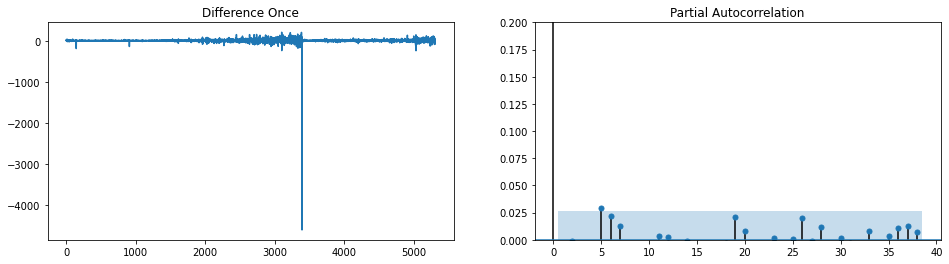

In [137]:
diff=asian.Close.diff().dropna() # First oeder of differencing 
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);
ax2.set_ylim(0,0.2);

We can observe the PACF lag `5` is significant as it is above the significance line.

### 3.4 (q) Order of moving average (MA) term.

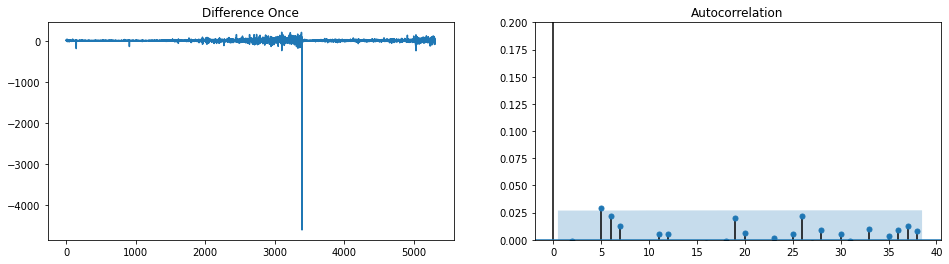

In [138]:
diff=asian.Close.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);
ax2.set_ylim(0,0.2);

We are gonna choose `5` as our `q` term.

### 3.5 Fitting the ARIMA Model

In [139]:
model=ARIMA(asian.Close,order=(5,1,5)) # order=(p,d,q)
result=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [140]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5306
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -29935.878
Date:                Sun, 23 Oct 2022   AIC                          59893.755
Time:                        19:09:26   BIC                          59966.096
Sample:                             0   HQIC                         59919.034
                               - 5306                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4425      0.959      0.462      0.644      -1.436       2.321
ar.L2         -0.3088      1.375     -0.225      0.822      -3.004       2.386
ar.L3         -0.3088      1.386     -0.223      0.8

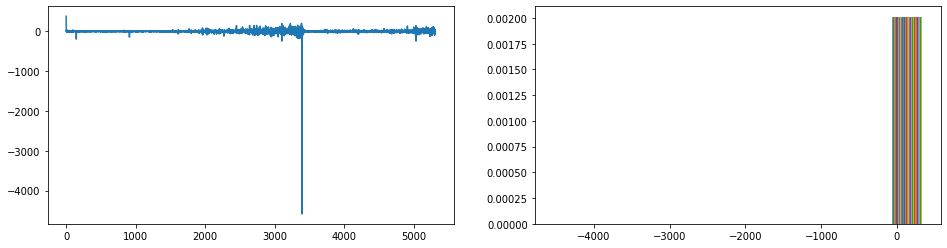

In [141]:
residuals=pd.DataFrame(result.resid)
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(16,4))
ax1.plot(residuals);
ax2.hist(residuals,density=True);

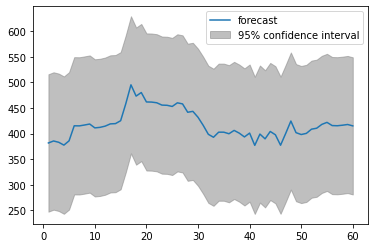

In [142]:
plot_predict(result,start=1,end=60,dynamic=False,);

### Train and Test Split

In [212]:
train=asian['Close'][:-15]
test=asian['Close'][-15:]

In [215]:
print(len(train),len(test))

5291 15


In [216]:
model=ARIMA(train,order=(5,1,5))
result=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [217]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 5291
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -29855.891
Date:                Sun, 23 Oct 2022   AIC                          59733.781
Time:                        19:32:57   BIC                          59806.090
Sample:                             0   HQIC                         59759.052
                               - 5291                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4341      1.004      0.433      0.665      -1.533       2.401
ar.L2         -0.2989      1.381     -0.216      0.829      -3.006       2.408
ar.L3         -0.3067      1.373     -0.223      0.823      -2.998       2.384
ar.L4         -0.2245      0.694     -0.324      0.746      -1.584       1.135
ar.L5          0.0671      0.589      0.114      0.909      -1.087       1.221
ma.L1         -0.4401      1.004     -0.438      0.661      -2.407       1.527
ma.L2          0.3020      1.391      0.217      0.828      -2.424       3.028
ma.L3          0.2862      1.382      0.207      0.836      -2.423       2.996
ma.L4          0.2305      0.711      0.324      0.746      -1.163       1.624
ma.L5         -0.0389      0.596     -0.065      0.948      -1.207       1.129
sigma2      4679.5657     11.880    393.905      0.000    4656.281    4702.850
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):        3239433394.32
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.22   Skew:                           -57.12
Prob(H) (two-sided):                  0.00   Kurtosis:                      3834.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [226]:
step=15
fc=result.forecast(step,alpha=0.05)

In [227]:
fc=pd.Series(fc,index=test[:step].index)

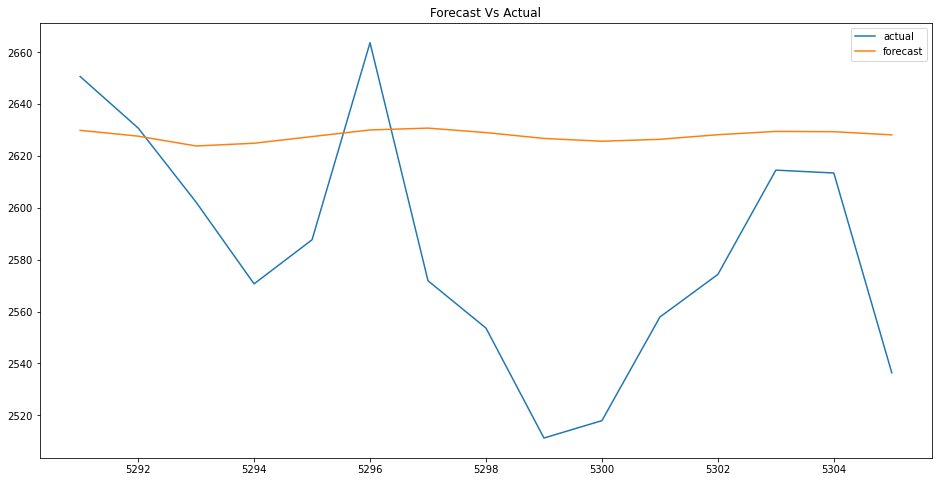

In [228]:
plt.figure(figsize=(16,8))
plt.plot(test,label="actual")
plt.plot(fc,label="forecast")
plt.title("Forecast Vs Actual")
plt.legend(loc="upper right")

In [230]:
mean_absolute_percentage_error(test[:step],fc)

0.020224038363224305

In [231]:
mse = mean_squared_error(test[:30], fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test[:30], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test[:30], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test[:30])/np.abs(test[:30]))
print('MAPE: '+str(mape))

MSE: 3811.106588981574
MAE: 51.718717884364466
RMSE: 61.73416063235633
MAPE: 0.020224038363224305


Achieved 2.02% MAPE!!!!!!!! 

### 3.6 Trying Auto ARIMA

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=59736.796, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=59738.706, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=59738.707, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=59735.000, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=59740.707, Time=0.62 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.567 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5291
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -29866.500
Date:                Sun, 23 Oct 2022   AIC                          59735.000
Time:                        19:33:48   BIC                          59741.573
Sample:                             0   HQIC                         59737.297
                               - 5291                                  

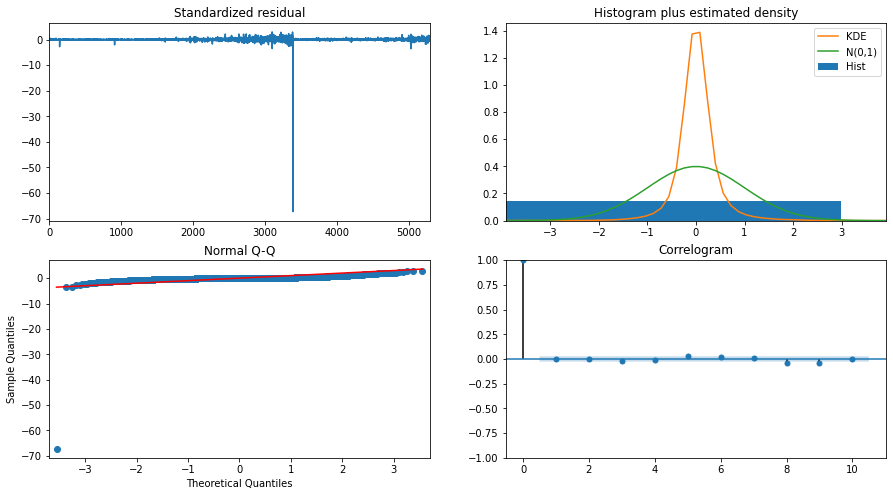

In [233]:
model_autoARIMA = auto_arima(train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [234]:
model = ARIMA(train, order=(0,1,0))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5291
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -29866.500
Date:                Sun, 23 Oct 2022   AIC                          59735.000
Time:                        19:33:48   BIC                          59741.573
Sample:                             0   HQIC                         59737.297
                               - 5291                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4692.0096      2.074   2262.009      0.000    4687.944    4696.075
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):        3299319925.86
Prob(Q):                              0.76   Pr

In [243]:
fc= fitted.forecast(15, alpha=0.05)  # 95% conf
result = fitted.get_forecast(15)
conf = result.conf_int(alpha=0.05)

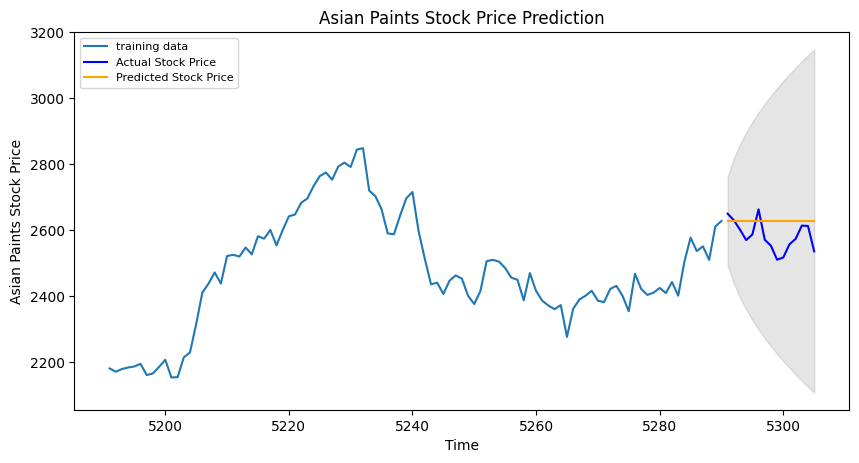

In [249]:
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf['lower Close'], index=test.index)
upper_series = pd.Series(conf['upper Close'], index=test.index)

plt.figure(figsize=(10,5), dpi=100)
plt.plot(train[-100:], label='training data')
plt.plot(test, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Asian Paints Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Asian Paints Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [248]:
mse = mean_squared_error(test, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test)/np.abs(test))
print('MAPE: '+str(mape))

MSE: 3944.092499999994
MAE: 52.70333333333331
RMSE: 62.80201031814184
MAPE: 0.020607390365492605


With Auto ARIMA, Achieved 2.06 % MAPE